This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [48]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [49]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [50]:
train_labels[0]

np.int64(1)

In [51]:
decoded_review[0]

'?'

In [52]:
max([max(sequence) for sequence in train_data])

9999

In [53]:
[i for i in range(5)] #기초가 되는건가봐... 파이썬 좀 더 독학하고 오렴....

[0, 1, 2, 3, 4]

**Decoding reviews back to text**

In [54]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #key value를 바라보는 것
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #dictinonary object


In [74]:
for (key1, val1) in word_index.items() :#이거 코드 여쭤보기...
  print (key1,val1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
'face 51348
morel's 86485
recites 21109
gassy 86487
armpits 51349
deformed 10032
androgynous 30391
citra 86488
quivers 86489
presto 23495
'animal 76646
excitedly 36812
bites 8415
biter 27495
claim 2305
stayin' 86490
amalio 51351
rottentomatoes 40479
mugur 51352
uruguay 40480
agent 1541
meneses 86491
negulesco 86492
flamboyance 27496
'kid' 86493
brontes 51353
excpet 71187
clair 13858
woopie 51354
recited 40481
yashpal 86494
whisperish 86495
nyu 40482
churlishly 51355
idia 76709
africa' 86497
nye 34465
vambo 86498
staying 4007
altioklar 51356
accessory 30392
a'vuchella 58725
sputnick 51357
aisles 25132
agustí 51358
piloted 30393
joanie's 51359
omen 5118
kong's 23656
holdouts 86499
'george' 86500
instills 30394
switch 4413
african 2042
procuror 65621
hilarities 86501
meyerling's 48428
undoing 19444
development' 86502
eniemy 73997
seizing 27497
islander 46060
schnaas's 86504
sculpts 76785
spinoff 86505
kangho 86506
natalie's 34468
irene 6531
irresolute 8

In [ ]:
word_index #모든 단어를 포함한 것

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #1열에서 순서를 보는 것임... 이게 텍스트 분석에 쓰이는 것. 숫자에 해당하는 word_index가 존재
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) #시퀀스에서 length는 다 다르다
#로지스틱 regression을 사용해서 분석하렴
#벡터 function을 이용하여....

In [ ]:
x_train[0]

In [ ]:
x_train.shape

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32") #d타입을 바꾼 것

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"), #1,2는 히든
    layers.Dense(1, activation="sigmoid") #이 레이어가 아웃풋
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:] #데이터셋을 나눔

In [ ]:
partial_x_train.shape

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
history_dict.keys()

**Plotting the training and validation loss**

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1) #1~20임
plt.plot(epochs #1부터 20, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() #loss가 감소하는 것을 알 수 있음. gradient가 loss를 감소하는 것으로... 근데 validation은 증가함
         #overfitting situation임 발리데이션...
         #5번째 epoch에서 오버피팅이기에, epoch4까지만 훈련해야한다

**Plotting the training and validation accuracy**

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]) #모델을 컴파일할 때 loss와 accuracy를 봐야함
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test) #output probabliity를 볼 수 있음
#마지막 dense는 시그모이드 함수형태를 띈다는 것을 알 수 있음.
#final layer의 아웃풋이 시그모이드

#만약 중간의 dense를 지운다면 logistic regression이 될 것임.


### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
train_labels[:5]

In [ ]:
y_train[:5, :] #1이 어디있는지 train_labels로 확인할 수 있음

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.4346 - loss: 3.1171 - val_accuracy: 0.6300 - val_loss: 1.7414
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6832 - loss: 1.5514 - val_accuracy: 0.6920 - val_loss: 1.3530
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7462 - loss: 1.1497 - val_accuracy: 0.7350 - val_loss: 1.1806
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7890 - loss: 0.9520 - val_accuracy: 0.7670 - val_loss: 1.0696
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8293 - loss: 0.7921 - val_accuracy: 0.7820 - val_loss: 0.9983
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8608 - loss: 0.6454 - val_accuracy: 0.7920 - val_loss: 0.9447
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8816 - loss: 0.5546 - val_accuracy: 0.8150 - val_loss: 0.9011
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9036 - loss: 0.4657 - val_accuracy: 0.8180 - 

**Plotting the training and validation loss**

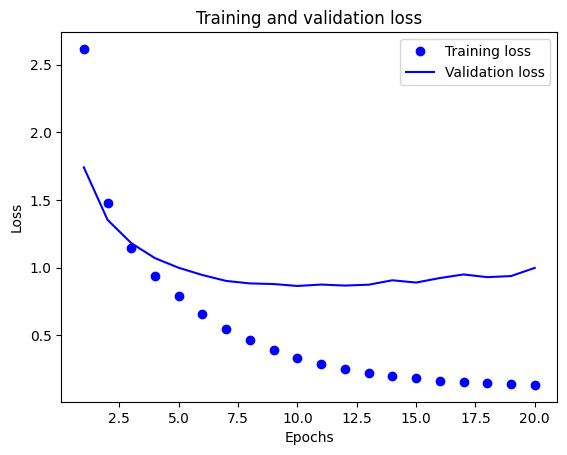

In [59]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

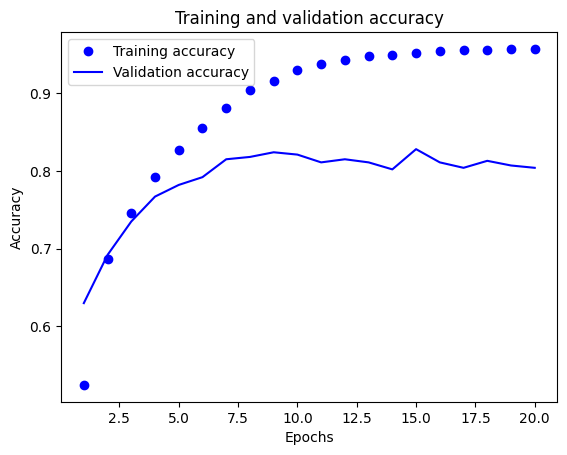

In [60]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [61]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4117 - loss: 3.1530
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6656 - loss: 1.5701
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7485 - loss: 1.1440
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7882 - loss: 0.9531
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8299 - loss: 0.7691
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8650 - loss: 0.6267
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8871 - loss: 0.5216
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9103 - loss: 0.4271
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9233 - loss: 0.3646
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8036 - loss: 0.8865


In [ ]:
results

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

### Generating predictions on new data

In [62]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [63]:
predictions[0].shape

(46,)

In [64]:
np.sum(predictions[0])

np.float32(1.0)

In [65]:
np.argmax(predictions[0])

np.int64(3)

### A different way to handle the labels and the loss

In [66]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [68]:
y_test[:5] #label은 0부터 시작함

array([0, 1, 1, 0, 1])

In [67]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #loss를 특정하게 된다면 케라스 트레이닝 안에서 y 레이블을 바꿔서 실행하게 됨.
              #y레이블이 3, 10, 1, 4, 4라면... 이걸 바꿔서 사용하게 되는거임.... 이 케라스는
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [69]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"), #차ㅇ춴을 늘릴 수 있음. 근데 차원간의숫자는 비슷해야함. Dense 바로 옆에 있는 숫자가 차원을 뜻하는 것임
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2430 - loss: 3.1761 - val_accuracy: 0.5160 - val_loss: 2.1525
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5274 - loss: 1.9994 - val_accuracy: 0.6200 - val_loss: 1.7250
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6287 - loss: 1.5776 - val_accuracy: 0.6430 - val_loss: 1.5745
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6826 - loss: 1.3259 - val_accuracy: 0.6700 - val_loss: 1.4688
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6977 - loss: 1.2340 - val_accuracy: 0.6680 - val_loss: 1.4406
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7135 - loss: 1.1624 - val_accuracy: 0.6690 - val_loss: 1.3991
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7273 - loss: 1.0815 - val_accuracy: 0.6770 - val_loss: 1.3921
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7490 - loss: 0.9771 - val_accuracy: 0.6880 - v

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary